In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("group3_dataset.csv")

In [3]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [4]:
df.shape

(150000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [42]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings',
       'Customer Rating', 'Payment Method', 'month_name', 'hour',
       'time_of_day', 'user_type', 'customer_type', 'weekday', 'is_cancelled',
       'week'],
      dtype='object')

In [41]:
df[df["Reason for cancelling by Customer"].isnull()==False]

KeyError: 'Reason for cancelling by Customer'

In [7]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
columns_to_drop = [
    'Cancelled Rides by Customer',
    'Reason for cancelling by Customer',
    'Cancelled Rides by Driver',
    'Driver Cancellation Reason',
    'Incomplete Rides',
    'Incomplete Rides Reason'
]
df = df.drop(columns=columns_to_drop)          # Drop the columns

df['Avg VTAT'] = df['Avg VTAT'].fillna(df['Avg VTAT'].mean())
df['Avg CTAT'] = df['Avg CTAT'].fillna(df['Avg CTAT'].mean())

numeric_cols = ['Booking Value', 'Ride Distance']          # Fill with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

df['Payment Method'] = df['Payment Method'].fillna("Unknown")                                   # Fill Unknown to null payment method

In [10]:
df['Date'] = pd.to_datetime(df['Date'])                           # Convert Date and Time column to datetime
# df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')


In [11]:
df.isnull().sum()

Date                   0
Time                   0
Booking ID             0
Booking Status         0
Customer ID            0
Vehicle Type           0
Pickup Location        0
Drop Location          0
Avg VTAT               0
Avg CTAT               0
Booking Value          0
Ride Distance          0
Driver Ratings     57000
Customer Rating    57000
Payment Method         0
dtype: int64

###  Get value counts of Booking Status Column 

In [12]:
df["Booking Status"].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

# Booking & Ride Patterns

#### overall booking success vs. cancellation rate?

In [13]:
df['Booking Status'] = df['Booking Status'].str.strip()
print(df['Booking Status'].value_counts(normalize=True) * 100)  # percentage

Booking Status
Completed                62.0
Cancelled by Driver      18.0
No Driver Found           7.0
Cancelled by Customer     7.0
Incomplete                6.0
Name: proportion, dtype: float64


#### Which months had the highest/lowest number of rides? Do we see seasonal trends?

In [14]:
df['month_name'] = df['Date'].dt.month_name()

# Count rides per month
monthly_counts = df['month_name'].value_counts().sort_index(key=lambda x: pd.to_datetime(x, format='%B'))
print("Rides per month:\n", monthly_counts)

# Highest and lowest month
highest_month = monthly_counts.idxmax()
lowest_month = monthly_counts.idxmin()

print(f"\nHighest rides in: {highest_month} ({monthly_counts.max()} rides)")
print(f"Lowest rides in: {lowest_month} ({monthly_counts.min()} rides)")


Rides per month:
 month_name
January      12861
February     11927
March        12719
April        12199
May          12778
June         12440
July         12897
August       12636
September    12248
October      12651
November     12394
December     12250
Name: count, dtype: int64

Highest rides in: July (12897 rides)
Lowest rides in: February (11927 rides)


#### What time of day has the highest demand (morning, afternoon, evening, late night)?

In [15]:
# Extract hour
df['hour'] = df['Time'].dt.hour

# Map to time of day
def time_of_day(h):
    if 5 <= h < 12: return 'Morning'
    if 12 <= h < 17: return 'Afternoon'
    if 17 <= h < 22: return 'Evening'
    return 'Late Night'

df['time_of_day'] = df['hour'].apply(time_of_day)

print(df['time_of_day'].value_counts())


time_of_day
Evening       52221
Morning       45458
Afternoon     37342
Late Night    14979
Name: count, dtype: int64


#### What percentage of customers are repeat users vs. one-time users?

In [16]:
user_counts = df.groupby('Customer ID')['Booking ID'].nunique()

repeat_share = (user_counts > 1).mean() * 100
one_time_share = (user_counts == 1).mean() * 100

print(f"Repeat users: {repeat_share:.2f}%")
print(f"One-time users: {one_time_share:.2f}%")

Repeat users: 0.81%
One-time users: 99.19%


# Cancellations (Customer vs. Driver)

### What is the distribution of customer cancellations vs. driver cancellations?

In [17]:
# Get counts of booking status
status_counts = df['Booking Status'].value_counts()

# Extract cancellation counts
customer_cancel = status_counts.get('Cancelled by Customer', 0)
driver_cancel = status_counts.get('Cancelled by Driver', 0)

# Total cancellations (both)
total_cancels = customer_cancel + driver_cancel

# Calculate percentages
customer_rate = (customer_cancel / total_cancels) * 100 if total_cancels > 0 else 0
driver_rate = (driver_cancel / total_cancels) * 100 if total_cancels > 0 else 0

# Print results
print(f"Customer cancellations: {customer_rate:.2f}% ({customer_cancel})")
print(f"Driver cancellations: {driver_rate:.2f}% ({driver_cancel})")


Customer cancellations: 28.00% (10500)
Driver cancellations: 72.00% (27000)


#### Do cancellations vary by vehicle type (Sedan, SUV, Auto, Bike)?

In [18]:
cancellations = df[df['Booking Status'].str.contains('Cancelled', case=False,)]
print(cancellations['Vehicle Type'].value_counts())

Vehicle Type
Auto             9323
Go Mini          7427
Go Sedan         6863
Bike             5652
Premier Sedan    4516
eBike            2630
Uber XL          1089
Name: count, dtype: int64


#### Which city/region shows the highest cancellation rates?

In [19]:
loc_cancel = df.groupby('Pickup Location').apply(
    lambda g: (g['Booking Status'].str.contains('Cancelled', case=False).sum() / len(g))*100
)
print(loc_cancel.sort_values(ascending=False).head(10))

Pickup Location
Vinobapuri             29.647631
Akshardham             29.558999
Munirka                28.466258
Qutub Minar            28.311057
Kadarpur               28.199052
Faridabad Sector 15    28.038508
GTB Nagar              27.752294
Shahdara               27.682927
Nehru Place            27.570621
Karkarduma             27.511962
dtype: float64


C:\Users\rajpu\AppData\Local\Temp\ipykernel_31044\271739642.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loc_cancel = df.groupby('Pickup Location').apply(


# Customer & Driver Behavior

### Which customer segments (frequent users vs. occasional) have higher success rates?

In [20]:
# Count total bookings per customer
cust_counts = df.groupby('Customer ID')['Booking ID'].nunique()

# Segment customers
df['user_type'] = df['Customer ID'].map(lambda x: 'Frequent' if cust_counts[x] > 1 else 'Occasional')
success_count = df[df['Booking Status'] == 'Completed'].groupby('user_type')['Booking ID'].count()
success_rate = df[df['Booking Status'] == 'Completed'].groupby('user_type')['Booking ID'].count() / df.groupby('user_type')['Booking ID'].count()
print(df.groupby('user_type')['Booking ID'].count())
print(success_count)
print(success_rate)


user_type
Frequent        2418
Occasional    147582
Name: Booking ID, dtype: int64
user_type
Frequent       1484
Occasional    91516
Name: Booking ID, dtype: int64
user_type
Frequent      0.613730
Occasional    0.620103
Name: Booking ID, dtype: float64


### Are cancellations higher among new customers compared to loyal customers?

In [21]:
# Count bookings per customer
cust_counts = df.groupby('Customer ID')['Booking ID'].nunique()

df['customer_type'] = df['Customer ID'].apply(lambda x: 'Loyal' if cust_counts[x] > 1 else 'New')

total = df.groupby('customer_type').size()
print("total ride by customer type",total)

cancelled = df[df['Booking Status'].str.contains('Cancelled', case=False,)].groupby('customer_type').size()
print("cancelled ride by user type",cancelled)

cancellation_rate = (cancelled / total) * 100


print(f"Loyal customers cancellation rate: {cancellation_rate['Loyal']:.2f}%")
print(f"New customers cancellation rate: {cancellation_rate['New']:.2f}%")


total ride by customer type customer_type
Loyal      2418
New      147582
dtype: int64
cancelled ride by user type customer_type
Loyal      620
New      36880
dtype: int64
Loyal customers cancellation rate: 25.64%
New customers cancellation rate: 24.99%


# Satisfaction & Performance

#### What is the distribution of customer ratings for successful rides?

In [22]:
successful_rides = df[df['Booking Status'].str.contains('Completed', case=False)]

# Distribution of ratings
rating_distribution = successful_rides['Customer Rating'].value_counts().sort_index()

print("Customer Rating Distribution (counts):")
print(rating_distribution)

Customer Rating Distribution (counts):
Customer Rating
3.0      468
3.1     1008
3.2      881
3.3      900
3.4      928
3.5      443
3.6     1194
3.7     2354
3.8     2357
3.9     2370
4.0     1185
4.1     5396
4.2    10697
4.3    10995
4.4     5279
4.5     5890
4.6    11533
4.7     5763
4.8     5880
4.9    11642
5.0     5837
Name: count, dtype: int64


# Do cancellations affect customer satisfaction (low ratings after cancellations)?

In [23]:
# Define cancellation statuses
cancel_statuses = ['Cancelled by Driver', 'Cancelled by Customer', 'No Driver Found']
 
# Average rating for completed rides
completed_avg = df[df['Booking Status'] == 'Completed']['Customer Rating'].mean()
 
# Average rating for cancellations
cancel_avg = df[df['Booking Status'].isin(cancel_statuses)]['Customer Rating'].mean()
 
print(f"Average rating after Completed rides: {completed_avg:.2f}")
print(f"Average rating after Cancellations: {cancel_avg:.2f}")

Average rating after Completed rides: 4.40
Average rating after Cancellations: nan


#### Are certain vehicle types rated higher than others?

In [24]:
df.groupby("Vehicle Type")["Customer Rating"].mean()

Vehicle Type
Auto             4.402000
Bike             4.403940
Go Mini          4.404297
Go Sedan         4.409996
Premier Sedan    4.403457
Uber XL          4.404851
eBike            4.403954
Name: Customer Rating, dtype: float64

### Can we identify pain points (e.g., cancellations during rush hours, poor ratings for specific routes)?

In [25]:
df.groupby("Vehicle Type")["Customer Rating"].mean()

Vehicle Type
Auto             4.402000
Bike             4.403940
Go Mini          4.404297
Go Sedan         4.409996
Premier Sedan    4.403457
Uber XL          4.404851
eBike            4.403954
Name: Customer Rating, dtype: float64

# Visualization Tasks

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Plot cancellation rate vs. time of day (heatmap).

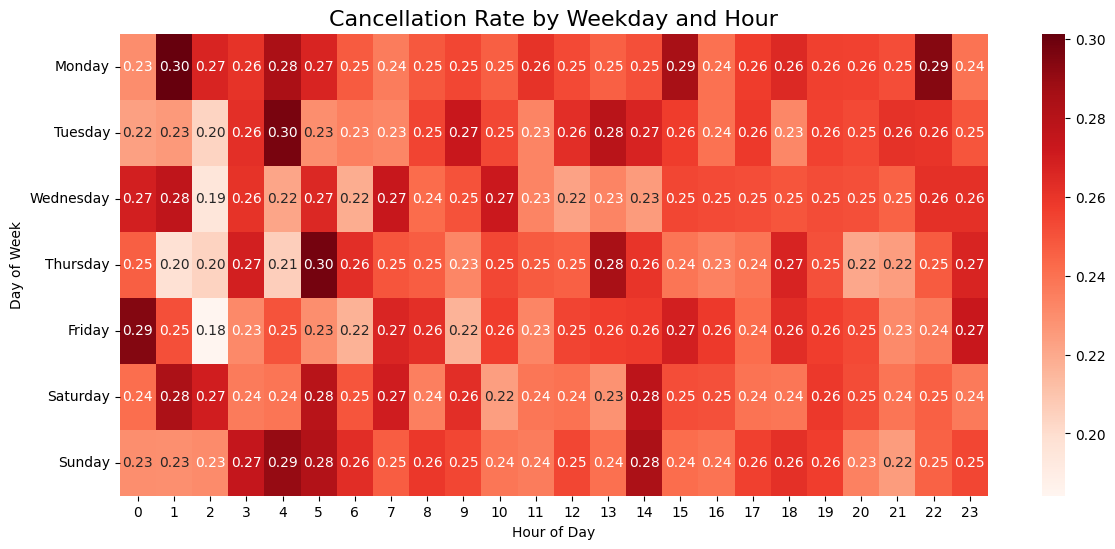

In [27]:
df['hour'] = df['Time'].dt.hour
df['weekday'] = df['Date'].dt.day_name()

#  Cancellation flag
df['is_cancelled'] = df['Booking Status'].str.contains('Cancelled', case=False, na=False).astype(int)

#  Pivot table for cancellation rate
heatmap_data = df.pivot_table(
    index='weekday',
    columns='hour',
    values='is_cancelled',
    aggfunc='mean',  # mean gives cancellation rate
    fill_value=0
)


#  Reorder weekdays
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_data = heatmap_data.reindex(week_order)

# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt=".2f")
plt.title("Cancellation Rate by Weekday and Hour", fontsize=16)
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.show()


#### bar chart showing revenue per vehicle type

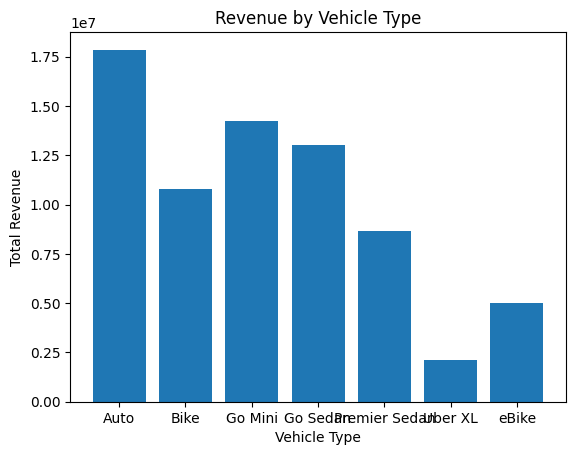

In [28]:
revenue_by_vehicle = df.groupby('Vehicle Type')['Booking Value'].sum()
plt.bar(revenue_by_vehicle.index, revenue_by_vehicle.values,)
plt.title("Revenue by Vehicle Type")
plt.ylabel("Total Revenue")
plt.xlabel("Vehicle Type")
plt.show()


#### Plot weekly booking trends (line chart).

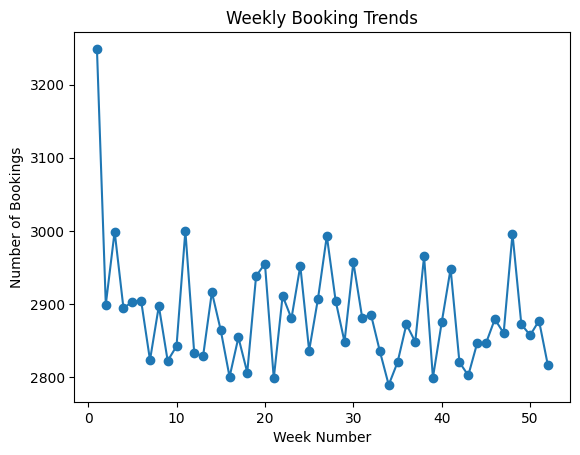

In [29]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Now extract ISO week
df['week'] = df['Date'].dt.isocalendar().week

# Example: count bookings per week
weekly_trends = df.groupby('week')['Booking ID'].count()

plt.plot(weekly_trends.index, weekly_trends.values, marker='o')
plt.xlabel("Week Number")
plt.ylabel("Number of Bookings")
plt.title("Weekly Booking Trends")
plt.show()



#### Use boxplots to compare trip fares across vehicle types.

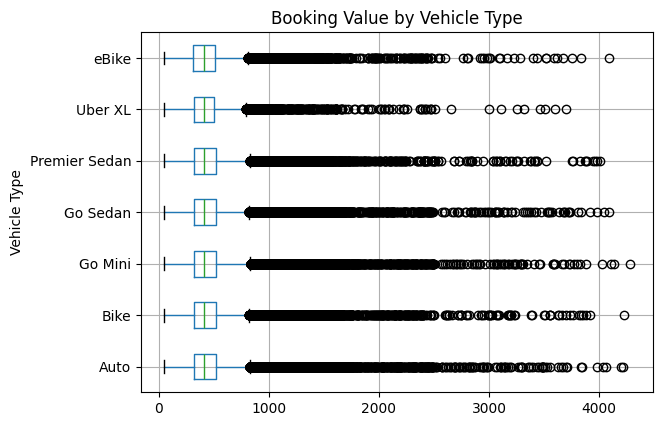

In [30]:
df.boxplot(column='Booking Value', by='Vehicle Type', vert=False)
plt.title("Booking Value by Vehicle Type")
plt.suptitle("")
plt.show()


In [31]:
# Define cancellation statuses
cancel_statuses = ['Cancelled by Driver', 'Cancelled by Customer', 'No Driver Found']

# Average rating for completed rides
completed_avg = df[df['Booking Status'] == 'Completed']['Customer Rating'].mean()

# Average rating for cancellations
cancel_avg = df[df['Booking Status'].isin(cancel_statuses)]['Customer Rating'].mean()

print(f"Average rating after Completed rides: {completed_avg:.2f}")
print(f"Average rating after Cancellations: {cancel_avg:.2f}")


Average rating after Completed rides: 4.40
Average rating after Cancellations: nan


In [32]:
plt.show()

print("Top pickup locations:\n", df['Pickup Location'].value_counts().head(10))
print("Top drop locations:\n", df['Drop Location'].value_counts().head(10))

Top pickup locations:
 Pickup Location
Khandsa             949
Barakhamba Road     946
Saket               931
Badarpur            921
Pragati Maidan      920
Madipur             919
AIIMS               918
Mehrauli            915
Dwarka Sector 21    914
Pataudi Chowk       907
Name: count, dtype: int64
Top drop locations:
 Drop Location
Ashram                936
Basai Dhankot         917
Lok Kalyan Marg       916
Narsinghpur           913
Cyber Hub             912
Kalkaji               912
Kashmere Gate ISBT    909
Udyog Vihar           906
Lajpat Nagar          904
Nehru Place           902
Name: count, dtype: int64


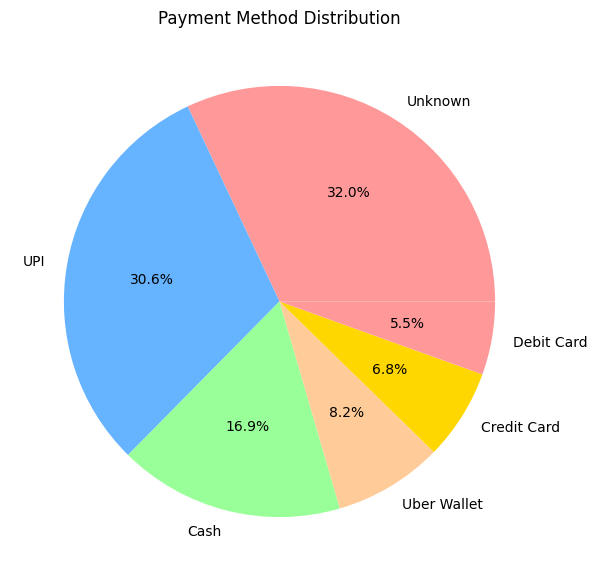

In [33]:
payment_counts = df['Payment Method'].value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=['#FF9999','#66B3FF','#99FF99','#FFCC99','#FFD700'])
plt.title('Payment Method Distribution')
plt.show()

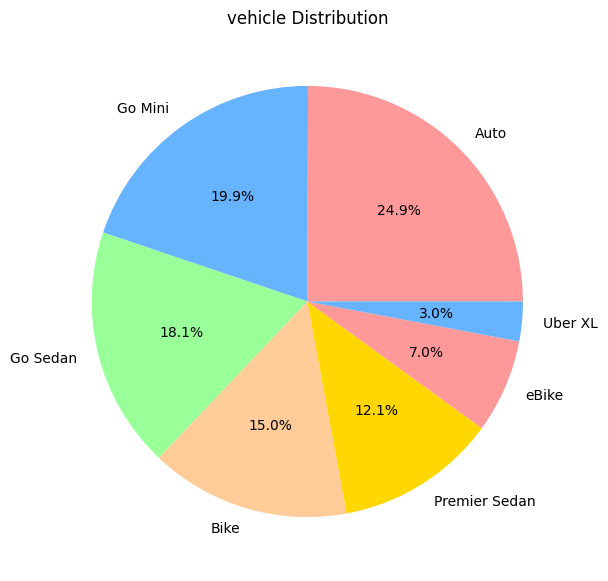

In [34]:
Vehicle_counts = df['Vehicle Type'].value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(Vehicle_counts, labels=Vehicle_counts.index, autopct='%1.1f%%', colors=['#FF9999','#66B3FF','#99FF99','#FFCC99','#FFD700'])
plt.title('vehicle Distribution')
plt.show()

In [44]:
df["Pickup Location"].value_counts()

Pickup Location
Khandsa             949
Barakhamba Road     946
Saket               931
Badarpur            921
Pragati Maidan      920
                   ... 
Mandi House         800
Noida Sector 18     799
Laxmi Nagar         797
Ashok Vihar         796
Ghitorni Village    790
Name: count, Length: 176, dtype: int64